<a href="https://colab.research.google.com/github/jock36/donkeycar_calibrate/blob/master/donkey_car_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#利用Colab幫助我們訓練Donkey Car
這個notebook可以幫助我們透過Google Colab加速訓練 Donkey car


#1.安裝Tensorflow 環境
由於Donke car環境和新版的Tensorflow有相容性問題，所以我們不推薦安裝最新版本的Tensorflow



In [2]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 46kB/s 
     |████████████████████████████████| 3.2MB 33.5MB/s 
     |████████████████████████████████| 368kB 53.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


#檢查GPU是否有開啟

運行下面程式可以看GPU是否有在運行
若顯示 GPU device not found

![代替テキスト](https://i.imgur.com/nv98mUc.png)

要到Runtime > Change Run Time Type
將None換成GPU再重新執行一次

![代替テキスト](https://i.imgur.com/bRVpx7f.png)

![代替テキスト](https://i.imgur.com/TEPhLSq.png)


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Found GPU at: /device:GPU:0


#複製Donkey car環境

我們從github上將 donkeycar的環境包下載下來

https://github.com/autorope/donkeycar

並且存於donkey資料夾內

In [4]:
!git clone https://github.com/autorope/donkeycar.git donkey

Cloning into 'donkey'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 11000 (delta 7), reused 4 (delta 1), pack-reused 10986
Receiving objects: 100% (11000/11000), 58.82 MiB | 51.13 MiB/s, done.
Resolving deltas: 100% (6837/6837), done.


#安裝Donkey car 環境


In [5]:
!pip3 install -e donkey

Obtaining file:///content/donkey
     |████████████████████████████████| 102kB 3.4MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.0-cp36-none-any.whl size=61416 sha256=4cc632ef2f07bfcb25169cb62df3d83e3ab100df43ff14fa2f378b1d2e82520c
  Stored in directory: /root/.cache/pip/wheels/02/94/6c/8474137cb7a5a3e001d70a22c8ff919caee69435376bccce79
Successfully built paho-mqtt
  Running setup.py develop for donkeycar


#建立工作目錄

目錄名稱可以自行命名，本篇範例名稱為mycar

In [6]:
!donkey createcar --path /content/mycar

using donkey v3.1.1 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


#準備練用的檔案
當我們收集完畢數張照片後，要將其壓縮並上傳至colab上進行訓練

那麼在Jetson nano 上我們輸入下面指令


> $zip -r data.zip tub_檔案編號_檔案日期/

壓縮完畢後，複製至個人電腦桌面上，我們準備上傳檔案


#將data.zip上傳至colab

運行下方程式會出現上傳檔案按鈕，點擊後選擇data.zip並開啟

程式會自動將zip檔解壓縮完畢

In [8]:
import os
from google.colab import files

if(os.path.exists("/content/data.zip")):
   os.remove("/content/data.zip")
if(os.path.exists("/content/mycar/data/data.zip")):
   os.remove("/content/mycar/data/data.zip")
   
uploaded = files.upload()

WORK_FOLDER = "/content/mycar/data/"
if(os.path.exists(WORK_FOLDER) == False):
  os.makedirs(WORK_FOLDER)

!mv /content/data.zip /content/mycar/data/
%cd /content/mycar/data/
!unzip -o data.zip

Saving data.zip to data.zip
/content/mycar/data
Archive:  data.zip
   creating: tub_23_19-08-16/
  inflating: tub_23_19-08-16/10000_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10001_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10002_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10003_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10004_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10005_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10006_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10007_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10008_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10009_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/1000_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10010_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10011_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10012_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10013_cam-image_array_.jpg  
  inflating: tub_23_19-08-16/10014

#清除上傳的壓縮檔

解壓縮完畢後，在data資料夾內有對應的照片以及json檔，此時我們可以將剛上傳的data.zip刪除

In [0]:
!rm /content/mycar/data/data.zip

#訓練模型


In [10]:
!python /content/mycar/manage.py train --model /content/mycar/models/mypilot.h5

using donkey v3.1.1 ...
loading config file: /content/mycar/config.py
loading personal config over-rides

config loaded
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

#顯示訓練結果曲線

我們可以透過colab將訓練完的結果圖顯示在coalb上

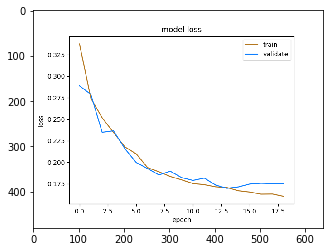

In [11]:
import matplotlib.pyplot as plt
import cv2
import glob
import os

list_of_png = glob.glob('/content/mycar/models/*png')
latest_png = max(list_of_png, key=os.path.getctime)

image = cv2.imread(latest_png)
plt.imshow(image)

#將模型放回Jetson nano中

將訓練好的模型「mypilot.h5」從colab中下載下來
在將模型置入Jetson nano中的mycar/models底下，即可執行自動駕駛模式